# Competitive Equilibria with Arrow Securities

## Introduction

This lecture presents Python code for experimenting with  competitive equilibria of  an infinite-horizon pure exchange economy with

* Heterogeneous agents
  
* Endowments of a single consumption that are person-specific functions of a common Markov state 

* Complete markets in one-period Arrow state-contingent securities

* Discounted expected utility preferences  of a kind often used in macroeconomics and finance

* Common expected utility preferences across agents

* Common beliefs across agents

* A constant relative risk aversion (CRRA)  one-period utility function that implies the existence of a representative consumer whose consumption process can be plugged into a formula for the pricing kernel for  one-step Arrow securities and thereby determine equilbrium prices before determining an equilibrium distribution of wealth

Diverse endowments across agents provide motivations for individuals to want to reallocate consumption goods across time and Markov states

We impose  restrictions that allow us to **Bellmanize** competitive equilibrium prices and quantities

We use  Bellman equations  to describe

* asset prices 

* continuation wealth levels for each person

* state-by-state natural debt limits for each person


In the course of presenting the model we shall describe these important ideas

*  a **resolvent operator**   widely  used in this class of models
  
* absence of  **borrowing limits** in finite horizon economies

* state-by-state **borrowing limits** required in infinite horizon economies

* a counterpart of the **law of iterated expectations** known as a **law of iterated values**

* a  **state-variable degeneracy** that prevails within a competitive equilibrium and that opens the way to various appearances of resolvent operators

## The setting

In effect, this lecture implements a Python version of  the model presented in section 9.3.3 of Ljungqvist and Sargent {cite}`Ljungqvist2012`.

### Preferences and endowments

In each period $t\geq 0$,  a stochastic
event $s_t \in {\bf S}$ is realized. 

Let the history of events up until time $t$
be denoted $s^t = [s_0, s_{1}, \ldots, s_{t-1}, s_t]$.

(Sometimes  we inadvertently reverse the recording order and  denote a history as $s^t = [s_t, s_{t-1}, \ldots, s_1, s_0]$.)

The unconditional
probability of observing a particular sequence of events $s^t$ is
given by a probability measure $\pi_t(s^t)$.

For $t > \tau$, we write the probability
of observing $s^t$ conditional on the realization of $s^\tau$as $\pi_t(s^t\vert s^\tau)$.

We  assume that trading occurs after
observing $s_0$,
which we capture by setting $\pi_0(s_0)=1$ for the initially
given value of $s_0$.

In this lecture we shall follow much macroeconomics and econometrics and assume that
$\pi_t(s^t)$  is induced by  a Markov process. 
 

There are $K$ consumers named $k=1, \ldots , K$.

Consumer $k$
owns a stochastic endowment of one good
$y_t^k(s^t)$ that depends on the
history $s^t$.

The history $s^t$ is publicly observable.


Consumer $i$
purchases a history-dependent  consumption plan $c^k =
 \{c_t^k(s^t)\}_{t=0}^\infty$ 
 
Consumer $i$  orders consumption plans by

$$ U_k(c^k) =
   \sum_{t=0}^\infty \sum_{s^t} \beta^t u_k[c_t^k(s^t)]
   \pi_t(s^t),
  $$
  
where $0 < \beta < 1$.

The right side is equal to $ E_0 \sum_{t=0}^\infty \beta^t
u_k(c_t^k) $, where $E_0$ is the mathematical expectation operator,
conditioned on $s_0$. 

Here $u_k(c)$ is an increasing, twice
continuously differentiable, strictly concave function of
consumption $c\geq 0$  of one good. 

The utility function pf person $k$ satisfies
the Inada condition

$$ \lim_{c \downarrow 0} u'_k(c) = +\infty.$$

This condition implies that each
agent chooses strictly positive consumption for every
date-history pair $(t, s^t)$. 

Those interior solutions enable us to confine our
analysis to Euler equations that hold with equality and also guarantee that
**natural debt limits**  don't bind  in economies like ours  with
sequential trading of Arrow securities.

We adopt the assumption, routinely
employed in much of macroeconomics,
that  consumers share   probabilities $\pi_t(s^t)$  for all $t$ and $s^t$.


A **feasible allocation** satisfies

$$
\sum_i c_t^k(s^t) \leq \sum_i y_t^k(s^t) 
$$

for all $t$ and for all $s^t$.

## Recursive Formulation

Following descriptions in section 9.3.3 of Ljungqvist and Sargent {cite}`Ljungqvist2012` chapter 9, we  set up  a competitive equilibrium of a pure exchange economy with complete markets in one-period Arrow securities.



When  endowments $y^k(s)$ are all functions of a common Markov state $s$,
the pricing kernel takes the form $Q(s'|s)$, where $Q(s'| s)$ is the price of one unit of consumption 
in state $s'$ at date $t+1$ when the Markov state at date $t$ is $s$.

These enable us to provide a
recursive formulation of a consumer's optimization problem.


Consumer $i$'s state at time $t$ is its financial wealth $a^k_t$ and Markov state $s_t$.

Let $v^k(a,s)$ be the optimal value of consumer $i$'s problem
starting from state $(a, s)$.

 * $v^k(a,s)$ is the maximum expected discounted utility  that consumer $i$ with current financial wealth $a$ can attain in Markov state $s$.
 
The optimal  value function satisfies the Bellman equation

$$
v^k(a, s) = \max_{c, \hat a(s')} \left\{ u_k(c) + \beta \sum_{s'} v^k[\hat a(s'),s'] \pi (s' | s) \right\}
$$ 


where  maximization is subject to the budget constraint

$$
c + \sum_{s'} \hat a(s') Q(s' | s)
     \leq  y^k(s) + a    
     $$
     
and also the constraints

$$
\begin{aligned}
c & \geq 0, \\
           -   \hat a(s') & \leq \bar A^k(s'), \hskip.5cm \forall s' \in {\bf S}
\end{aligned}
$$

with the second constraint evidently being a set of state-by-state debt limits.

Note that the value function and decision rule that solve  the Bellman equation implicitly depend
on the pricing kernel $Q(\cdot \vert \cdot)$ because it appears in the agent's budget constraint.

Use the first-order conditions for  the
problem on the right of the Bellman  equation and a 
Benveniste-Scheinkman formula and rearrange to get

$$ 
Q(s_{t+1} | s_t ) = {\beta u'_k(c_{t+1}^k) \pi(s_{t+1} | s_t)
                 \over u'_k(c_t^k) }, 
                 $$
                 
where it is understood that $c_t^k = c^k(s_t)$
and $c_{t+1}^k = c^k(s_{t+1})$.



A **recursive competitive equilibrium** is
an initial distribution of wealth $\vec a_0$, a set of borrowing limits $\{\bar A^k(s)\}_{k=1}^K$,
a pricing kernel $Q(s' | s)$, sets of value functions $\{v^k(a,s)\}_{i=1}^K$, and
decision rules $\{c^k(s), a^k(s)\}_{i=1}^K$ such
that

* The state-by-state borrowing constraints satisfy the recursion

$$
\bar A^k(s) = y^k(s) + \sum_{s'} Q(s'|s) \bar A^k(s')
$$

* For all $i$, given
 $a^k_0$, $\bar A^k(s)$,  and the pricing kernel, the value functions and decision rules
solve the consumers' problems;

* For all realizations of $\{s_t\}_{t=0}^\infty$, the consumption and asset
portfolios $\{\{c^k_t,$
$\{\hat a^k_{t+1}(s')\}_{s'}\}_i\}_t$  satisfy $\sum_i c^k_t = \sum_i y^k(s_t)$ and
$\sum_i \hat a_{t+1}^k(s') = 0$
for all $t$ and $s'$.

* The initial financial wealth vector $\vec a_0$ satisfies $\sum_{i=1}^K a_0^k = 0 $.
 
 
The third condition asserts that there are  zero net aggregate claims in all Markov states.

The fourth condition asserts that the economy is closed and  starts  from a situation in which there 
are  zero net aggregate claims.



## State Variable Degeneracy

Please see Ljungqvist and Sargent {cite}`Ljungqvist2012` for a description of 
timing protocol for trades  consistent with an  Arrow-Debreu vision in which

  * at time $0$ there are complete markets in a complete menu of history $s^t$-contingent claims on consumption at all dates that all trades occur at time zero
  * all trades occur once and for all at time $0$


If  an allocation and pricing kernel $Q$ in   a recursive competitive equilibrium are to be
consistent
with the equilibrium allocation and price system that prevail in a  corresponding complete markets economy with such history-contingent commodities and 
 all trades occurring at time $0$,
we must impose that $a_0^k = 0$ for $k = 1, \ldots , K$. 

That  is 
what assures that at time $0$ the present value of each agent's consumption equals the present value of his endowment stream,
the  single  budget constraint in   arrangement with all trades occurring at time $0$.



Starting the system  with $a_0^k =0$ forall $i$ has a striking implication that we can call **state variable degeneracy**.


Here is  what we mean by **state variable degeneracy**:

Although two state variables $a,s$ appear in the value function $v^k(a,s)$, within a recursive competitive equilibrium starting from $a_0^k = 0 \ \forall i$  at initial Markov state  $s_0$, two outcomes  prevail:


*  $a_0^k = 0 $ for all $i$ whenever the Markov state $s_t$ returns to   $s_0$.

* Financial wealth $a$ is an exact function of the Markov state $s$.  

The first finding  asserts that each household  recurrently visits the zero financial wealth state with which it began life.


The second finding  asserts that within a competitive equilibrium  the exogenous Markov state is all we require to track an individual.  

Financial wealth turns out to be redundant because it is an exact function of the Markov state for each individual.


This outcome depends critically on there being complete markets in Arrow securities.

For example, it does not prevail in the incomplete markets setting of this lecture {doc}`The Aiyagari Model <aiyagari>`

## Markov Asset Prices 


Let's start with a brief summary of formulas for computing asset prices in
a Markov setting.


The setup assumes the following infrastructure

* Markov states: $s \in S = \left[\bar{s}_1, \ldots, \bar{s}_n \right]$ governed by  an $n$-state Markov chain with transition probability

$$
P_{ij} = \Pr \left\{s_{t+1} = \bar{s}_j \mid s_t = \bar{s}_k \right\}
$$

* A collection $h=1,\ldots, H$ of  $n \times 1$ vectors of  $H$ assets that pay off  $d^h\left(s\right)$  in state $s$



* An $n \times n$ matrix  pricing kernel $Q$ for one-period Arrow securities, where $ Q_{ij}$  = price at time $t$ in state $s_t = 
\bar s_i$ of one unit of consumption when $s_{t+1} = \bar s_j$ at time $t+1$:


$$
Q_{ij} = {\textrm{Price}} \left\{s_{t+1} = \bar{s}_j \mid s_t = \bar{s}_i \right\}
$$

* The price of risk-free one-period bond in state $i$ is $R_i^{-1} = \sum_{j}Q_{i,j}$

* The gross rate of return on a one-period risk-free bond Markov state $\bar s_i$ is $R_i = (\sum_j Q_{i,j})^{-1}$

### Exogenous Pricing Kernel

At this point, we'll take the pricing kernel $Q$ as exogenous, i.e., determined outside the model

Two examples would be

* $ Q = \beta P $ where $\beta \in (0,1) $

* $Q = S P $ where $S$ is an $n \times n$ matrix of *stochastic discount factors*


We'll write down implications of  Markov asset pricing in a nutshell for two types of assets

  * the price in Markov state $s$ at time $t$ of a **cum dividend** stock that entitles the owner at the beginning of time $t$ to the time $t$ dividend and the option to sell the asset at time $t+1$.  The price evidently satisfies $p^h(\bar s_i) = d^h(\bar s_i) + \sum_j Q_{ij} p^h(\bar s_j) $, which implies that the vector $p^h$ satisfies $p^h = d^h + Q p^h$ which implies the formula 
  
$$
p^h = (I - Q)^{-1} d^h
$$


* the price in Markov state $s$ at time $t$ of an **ex dividend** stock that entitles the owner at the end  of time $t$ to the time $t+1$ dividend and the option to sell the stock at time $t+1$. The  price is 

$$ 
p^h = (I - Q)^{-1} Q d^h
$$


Below, we describe an equilibrium model with trading of one-period Arrow securities in which the pricing kernel is endogenous.

In constructing our model, we'll repeatedly encounter formulas that remind us of our asset pricing formulas.

### Multi-Step-Forward Transition Probabilities and Pricing Kernels

The $(i,j)$ component of  the $k$-step ahead transition probability $P^\ell$ is 

$$
Prob(s_{t+\ell} = \bar s_j | s_t = \bar s_i)   = P^{\ell}_{i,j}
$$

The $(i,j)$ component of  the $\ell$-step ahead pricing kernel $Q^\ell$ is


$$
Q^{(\ell)}(s_{t+\ell} = \bar s_j | s_t = \bar s_i)   = Q^{\ell}_{i,j}
$$


We'll use these objects to state a useful property in asset pricing theory.

### Laws of Iterated Expectations and Iterated Values

A  **law of iterated values** has a mathematical structure that parallels a
**law of iterated expectations**

We can describe its structure readily in the  Markov setting of this lecture

Recall the following recursion satisfied  by $j$ step ahead transition probabilites
for our finite state Markov chain:

$$
P_j(s_{t+j}| s_t)  = \sum_{s_{t+1}} P_{j-1}(s_{t+j}| s_{t+1}) P(s_{t+1} | s_t)
$$

We can use this recursion to verify the law of iterated expectations applied
to computing the conditional expectation of a random variable $d(s_{t+j})$ conditioned
on $s_t$ via the following string of equalities

$$
\begin{aligned}
E \left[ E d(s_{t+j}) | s_{t+1} \right] | s_t 
    & = \sum_{s_{t+1}} \left[ \sum_{s_{t+j}} d(s_{t+j}) P_{j-1}(s_{t+j}| s_{t+1} ) \right]         P(s_{t+1} | s_t) \\
 & = \sum_{s_{t+j}}  d(s_{t+j}) \left[ \sum_{s_{t+1}} P_{j-1} ( s_{t+j} |s_{t+1}) P(s_{t+1}| s_t) \right] \\
 & = \sum_{s_{t+j}} d(s_{t+j}) P_j (s_{t+j} | s_t ) \\
 & = E d(s_{t+j})| s_t
    \end{aligned}
$$

The pricing kernel for $j$ step ahead Arrow securities satisfies the recursion

$$
Q_j(s_{t+j}| s_t)  = \sum_{s_{t+1}} Q_{j-1}(s_{t+j}| s_{t+1}) Q(s_{t+1} | s_t)
$$


The time $t$ **value** in Markov state $s_t$  of a time $t+j$  payout $d(s_{t+j})$
is 


$$
V(d(s_{t+j})|s_t) = \sum_{s_{t+j}} d(s_{t+j}) Q_j(s_{t+j}| s_t) 
$$

The **law of iterated values** states

$$
V \left[ V (d(s_{t+j}) | s_{t+1}) \right] | s_t  =   V(d(s_{t+j}))| s_t
$$

We verify it by pursuing the following a string of inequalities that are counterparts to those we used
to verify the law of iterated expectations:

$$
\begin{aligned}
V \left[ V  ( d(s_{t+j}) | s_{t+1} ) \right] | s_t 
    & = \sum_{s_{t+1}} \left[ \sum_{s_{t+j}} d(s_{t+j}) Q_{j-1}(s_{t+j}| s_{t+1} ) \right]         Q(s_{t+1} | s_t) \\
 & = \sum_{s_{t+j}}  d(s_{t+j}) \left[ \sum_{s_{t+1}} Q_{j-1} ( s_{t+j} |s_{t+1}) Q(s_{t+1}| s_t) \right] \\
 & = \sum_{s_{t+j}} d(s_{t+j}) Q_j (s_{t+j} | s_t ) \\
 & = E V(d(s_{t+j}))| s_t
    \end{aligned}
$$

## General Equilibrium 

Now we are ready to do some fun calculations.

We find it interesting to think in terms of analytical **inputs** into and **outputs** from our general equilibrium theorizing.

### Inputs

* Markov states: $s \in S = \left[\bar{s}_1, \ldots, \bar{s}_n \right]$ governed by  an $n$-state Markov chain with transition probability

$$
P_{ij} = \Pr \left\{s_{t+1} = \bar{s}_j \mid s_t = \bar{s}_i \right\}
$$

* A collection of  $K \times 1$ vectors of individual $k$ endowments: $y^k\left(s\right), k=1,\ldots, K$

* An $n \times 1$ vector of aggregate endowment:  $y\left(s\right) \equiv \sum_{k=1}^K y^k\left(s\right)$

* A collection of  $K \times 1$ vectors of individual $k$ consumptions: $c^k\left(s\right), k=1,\ldots, K$

* A collection of restrictions  on feasible consumption allocations for $s \in S$:

$$
c\left(s\right)= \sum_{k=1}^K c^k\left(s\right) 
\leq  y\left(s\right) 
$$

* Preferences: a common utility functional across agents $ E_0 \sum_{t=0}^\infty \beta^t u(c^k_t) $ with  CRRA one-period utility function $u\left(c\right)$ and discount factor $\beta \in (0,1)$

The one-period utility function is 

$$
u \left(c\right) = \frac{c^{1-\gamma}}{1-\gamma}
$$

so that

$$
u^\prime \left(c\right) = c^{-\gamma}
$$

### Outputs

* An $n \times n$ matrix  pricing kernel $Q$ for one-period Arrow securities, where $ Q_{ij}$  = price at time $t$ in state $s_t = \bar s_i$ of one unit of consumption when $s_{t+1} = \bar s_j$ at time $t+1$ 

* pure exchange so that $c\left(s\right) = y\left(s\right)$

* a $K \times 1$ vector distribution of wealth vector $\alpha$, $\alpha_k \geq 0, \sum_{k=1}^K \alpha_k =1$

* A collection of $n \times 1$ vectors of individual $k$ consumptions: $c^k\left(s\right), k=1,\ldots, K$

### Matrix $Q$ to Represent Pricing Kernel


For any agent  $k \in \left[1, \ldots, K\right]$, at the equilibrium allocation,
the one-period Arrow securities pricing kernel satisfies

$$
Q_{ij} = \beta \left(\frac{c^k\left(\bar{s}_j\right)}{c^k\left(\bar{s}_i\right)}\right)^{-\gamma} P_{ij}
$$

where $Q$ is an $n \times n$ matrix


This follows from agent $k$'s first-order necessary conditions.

But with the CRRA preferences that we have assumed, individual consumptions vary proportionately
with aggregate consumption and therefore with the aggregate endowment.

  * This is a consequence of our preference specification implying that **Engle curves** affine in wealth and therefore  satisfy conditions for **Gorman aggregation**

Thus, 

$$
c^k \left(s\right) = \alpha_k c\left(s\right) = \alpha_k y\left(s\right)
$$

for an arbitrary   **distribution of wealth**  in the form of an   $K \times 1$ vector $\alpha$ 
that satisfies

$$ \alpha_k \in \left(0, 1\right), \quad \sum_{k=1}^K \alpha_k = 1 $$

This means that we can compute the pricing kernel from  

$$
Q_{ij} = \beta \left(\frac{y_j}{y_i}\right)^{-\gamma} P_{ij}
$$ (eq:Qformula)


Note that $Q_{ij}$ is independent of vector $\alpha$.



**Key finding:** We can compute competitive equilibrium **prices** prior to computing a **distribution of wealth**.

### Values 


Having computed an equilibrium pricing kernel $Q$, we can compute several **values** that are required
to pose or represent the solution of an individual household's optimum problem. 


We denote  an $K \times 1$ vector of  state-dependent values of agents' endowments in Markov state $s$ as

$$
A\left(s\right)=\left[\begin{array}{c}
A^{1}\left(s\right)\\
 \vdots\\
A^{K}\left(s\right)
\end{array}\right], \quad s \in \left[\bar{s}_1, \ldots, \bar{s}_n\right]
$$

and an  $n \times 1$ vector of continuation endowment values for each individual $k$ as

$$
A^{k}=\left[\begin{array}{c}
A^{k}\left(\bar{s}_{1}\right)\\
\vdots\\
A^{k}\left(\bar{s}_{n}\right)
\end{array}\right], \quad k \in \left[1, \ldots, K\right]
$$

$A^k$ of consumer $k$ satisfies

$$
A^k = \left[I - Q\right]^{-1} \left[ y^k\right]
$$

where

$$
y^{k}=\left[\begin{array}{c}
y^{k}\left(\bar{s}_{1}\right)\\
\vdots\\
y^{k}\left(\bar{s}_{n}\right)
\end{array}\right] \equiv \begin{bmatrix} y^k_1 \cr \vdots \cr v^k_n \end{bmatrix}
$$


In a competitive equilibrium of an **infinite horizon** economy with sequential trading of one-period Arrow securities, $A^k(s)$ serves as a state-by-state vector of **debt limits** on the quantities of one-period  Arrow securities
paying off  in state $s$ at time $t+1$ that individual $k$ can issue at time $t$.  


These are often called **natural debt limits**.

Evidently, they equal the maximum amount that it is feasible for  individual $k$ to repay
even if he consumes zero goods forevermore.

**Remark:** If  we have an Inada condition at zero consumption or just impose that consumption 
be nonnegative, then in a **finite horizon** economy with sequential trading of one-period Arrow securities there is no need to impose natural debt limits. See the section below on a Finite Horizon Economy.

### Continuation Wealth

Continuation wealth plays an important role in Bellmanizing a competitive equilibrium with sequential
trading of a complete set of one-period Arrow securities.


We denote  an $K \times 1$ vector of  state-dependent continuation wealths in Markov state $s$ as

$$
\psi\left(s\right)=\left[\begin{array}{c}
\psi^{1}\left(s\right)\\
\vdots\\
\psi^{K}\left(s\right)
\end{array}\right], \quad s \in \left[\bar{s}_1, \ldots, \bar{s}_n\right]
$$

and an  $n \times 1$ vector of continuation wealths for each individual $k$ as

$$
\psi^{k}=\left[\begin{array}{c}
\psi^{k}\left(\bar{s}_{1}\right)\\
\vdots\\
\psi^{k}\left(\bar{s}_{n}\right)
\end{array}\right], \quad k \in \left[1, \ldots, K\right]
$$

Continuation wealth  $\psi^k$ of consumer $k$ satisfies

$$
\psi^k = \left[I - Q\right]^{-1} \left[\alpha_k y - y^k\right]
$$ (eq:continwealth)

where

$$
y^{k}=\left[\begin{array}{c}
y^{k}\left(\bar{s}_{1}\right)\\
\vdots\\
y^{k}\left(\bar{s}_{n}\right)
\end{array}\right],\quad y=\left[\begin{array}{c}
y\left(\bar{s}_{1}\right)\\
\vdots\\
y\left(\bar{s}_{n}\right)
\end{array}\right]
$$

Note that $\sum_{k=1}^K \psi^k = {0}_{n \times 1}$.

**Remark:** At the initial state $s_0 \in \begin{bmatrix} \bar s_1, \ldots, \bar s_n \end{bmatrix}$,
the continuation wealth $\psi^k(s_0) = 0$ for all agents $k = 1, \ldots, K$.  This indicates that
the economy begins with  all agents being debt-free and financial-asset-free at time $0$, state $s_0$.  


**Remark:** Note that all agents' continuation wealths recurrently return to zero when the Markov state returns to whatever value $s_0$ it had at time $0$.

### Optimal Portfolios

A nifty feature of the model is that an optimal portfolio of  a type $k$ agent equals the continuation wealth that we just computed.

Thus, agent $k$'s state-by-state purchases of Arrow securities next period depend only on next period's
Markov state and equal

$$ 
a_k(s) = \psi^k(s), \quad s \in \left[\bar s_1, \ldots, \bar s_n \right]
$$ (eqn:optport)

### Equilibrium Wealth Distribution $\alpha$


With the initial state being  a particular state $s_0 \in \left[\bar{s}_1, \ldots, \bar{s}_n\right]$, 
we must have

$$
\psi^k\left(s_0\right) = 0, \quad k=1, \ldots, K
$$

which means the equilibrium distribution of wealth satisfies

$$
\alpha_k = \frac{V_z y^k}{V_z y}
$$ (eqn:alphakform)



where $V \equiv \left[I - Q\right]^{-1}$ and $z$ is the row index corresponding to the initial state $s_0$. 

Since $\sum_{k=1}^K V_z y^k = V_z y$,  $\sum_{k=1}^K \alpha_k = 1$.


In summary, here is the logical flow of an algorithm to compute a competitive equilibrium:

* compute $Q$ from the aggregate allocation and  formula {eq}`eq:Qformula`

* compute the distribution of wealth $\alpha$ from the formula {eq}`eqn:alphakform`

* Using  $\alpha$ assign each consumer $k$ the share  $\alpha_k$ of the aggregate endowment at each state

* return to the $\alpha$-dependent formula {eq}`eq:continwealth`  and compute continuation wealths

* via formula {eq}`eqn:optport` equate agent $k$'s portfolio to its continuation wealth state by state

We can also add formulas for optimal value functions in  a competitive equilibrium with trades
in a complete set of one-period state-contingent Arrow securities.

Call the optimal value functions $J^k$ for consumer $k$. 

For the infinite horizon economy now under study, the formula is

$$ J^k = (I - \beta P)^{-1} u(\alpha_k y)  , \quad u(c) = \frac{c^{1-\gamma}}{1-\gamma} $$

where it is understood that $ u(\alpha_k y)$ is a vector.

## Python Code

We are ready to dive into some Python code.


As usual, we start with Python imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.set_printoptions(suppress=True)

First, we create a Python class to compute  the objects that comprise a competitive equilibrium
with sequential trading of one-period Arrow securities.

In addition to  handly infinite-horizon economies, the code is set up to handle finite-horizon economies indexed by horizon $T$. 

We'll study some finite horizon economies after we look at some infinite-horizon economies.

In [3]:
class RecurCompetitive:
    """
    A class that represents a recursive competitive economy
    with one-period Arrow securities.
    """

    def __init__(self,
                 s,        # state vector
                 P,        # transition matrix
                 ys,       # endowments ys = [y1, y2, .., yI]
                 γ=0.5,    # risk aversion
                 β=0.98,   # discount rate
                 T=None):  # time horizon, none if infinite

        # preference parameters
        self.γ = γ
        self.β = β

        # variables dependent on state
        self.s = s
        self.P = P
        self.ys = ys
        self.y = np.sum(ys, 1)

        # dimensions
        self.n, self.K = ys.shape

        # compute pricing kernel
        self.Q = self.pricing_kernel()
        
        # compute price of risk-free one-period bond
        self.PRF = self.price_risk_free_bond()
        
        # compute risk-free rate
        self.R = self.risk_free_rate()

        # V = [I - Q]^{-1} (infinite case)
        if T is None:
            self.T = None
            self.V = np.empty((1, n, n))
            self.V[0] = np.linalg.inv(np.eye(n) - self.Q)
        # V = [I + Q + Q^2 + ... + Q^T] (finite case)
        else:
            self.T = T
            self.V = np.empty((T+1, n, n))
            self.V[0] = np.eye(n)

            Qt = np.eye(n)
            for t in range(1, T+1):
                Qt = Qt.dot(self.Q)
                self.V[t] = self.V[t-1] + Qt

        # natural debt limit
        self.A = self.V[-1] @ ys

    def u(self, c):
        "The CRRA utility"

        return c ** (1 - self.γ) / (1 - self.γ)

    def u_prime(self, c):
        "The first derivative of CRRA utility"

        return c ** (-self.γ)

    def pricing_kernel(self):
        "Compute the pricing kernel matrix Q"

        c = self.y

        n = self.n
        Q = np.empty((n, n))

        for i in range(n):
            for j in range(n):
                ratio = self.u_prime(c[j]) / self.u_prime(c[i])
                Q[i, j] = self.β * ratio * P[i, j]

        self.Q = Q

        return Q

    def wealth_distribution(self, s0_idx):
        "Solve for wealth distribution α"

        # set initial state
        self.s0_idx = s0_idx

        # simplify notations
        n = self.n
        Q = self.Q
        y, ys = self.y, self.ys

        # row of V corresponding to s0
        Vs0 = self.V[-1, s0_idx, :]
        α = Vs0 @ self.ys / (Vs0 @ self.y)

        self.α = α

        return α

    def continuation_wealths(self):
        "Given α, compute the continuation wealths ψ"

        diff = np.empty((n, K))
        for k in range(K):
            diff[:, k] = self.α[k] * self.y - self.ys[:, k]

        ψ = self.V @ diff
        self.ψ = ψ

        return ψ

    def price_risk_free_bond(self):
        "Give Q, compute price of one-period risk free bond"
        
        PRF = np.sum(self.Q, 0)
        self.PRF = PRF
        
        return PRF
    
    def risk_free_rate(self):
        "Given Q, compute one-period gross risk-free interest rate R"

        R = np.sum(self.Q, 0)
        R = np.reciprocal(R)
        self.R = R

        return R

    def value_functionss(self):
        "Given α, compute the optimal value functions J in equilibrium"

        n, T = self.n, self.T
        β = self.β
        P = self.P

        # compute (I - βP)^(-1) in infinite case
        if T is None:
            P_seq = np.empty((1, n, n))
            P_seq[0] = np.linalg.inv(np.eye(n) - β * P)
        # and (I + βP + ... + β^T P^T) in finite case
        else:
            P_seq = np.empty((T+1, n, n))
            P_seq[0] = np.eye(n)

            Pt = np.eye(n)
            for t in range(1, T+1):
                Pt = Pt.dot(P)
                P_seq[t] = P_seq[t-1] + Pt * β ** t

        # compute the matrix [u(α_1 y), ..., u(α_K, y)]
        flow = np.empty((n, K))
        for k in range(K):
            flow[:, k] = self.u(self.α[k] * self.y)

        J = P_seq @ flow

        self.J = J

        return J

### Example 1

Please read the preceding class for default parameter values and the  following Python code for the fundamentals of the economy.  

Here goes.

In [4]:
# dimensions
K, n = 2, 2

# states
s = np.array([0, 1])

# transition
P = np.array([[.5, .5], [.5, .5]])

# endowments
ys = np.empty((n, K))
ys[:, 0] = 1 - s       # y1
ys[:, 1] = s           # y2

In [5]:
ex1 = RecurCompetitive(s, P, ys)

In [6]:
# endowments
ex1.ys

array([[1., 0.],
       [0., 1.]])

In [7]:
# pricing kernal
ex1.Q

array([[0.49, 0.49],
       [0.49, 0.49]])

In [8]:
# Risk free rate R
ex1.R

array([1.02040816, 1.02040816])

In [9]:
# natural debt limit, A = [A1, A2, ..., AI]
ex1.A

array([[25.5, 24.5],
       [24.5, 25.5]])

In [10]:
# when the initial state is state 1
print(f'α = {ex1.wealth_distribution(s0_idx=0)}')
print(f'ψ = \n{ex1.continuation_wealths()}')
print(f'J = \n{ex1.value_functionss()}')

α = [0.51 0.49]
ψ = 
[[[ 0. -0.]
  [ 1. -1.]]]
J = 
[[[71.41428429 70.        ]
  [71.41428429 70.        ]]]


In [11]:
# when the initial state is state 2
print(f'α = {ex1.wealth_distribution(s0_idx=1)}')
print(f'ψ = \n{ex1.continuation_wealths()}')
print(f'J = \n{ex1.value_functionss()}')

α = [0.49 0.51]
ψ = 
[[[-1.  1.]
  [ 0. -0.]]]
J = 
[[[70.         71.41428429]
  [70.         71.41428429]]]


### Example 2

In [12]:
# dimensions
K, n = 2, 2

# states
s = np.array([1, 2])

# transition
P = np.array([[.5, .5], [.5, .5]])

# endowments
ys = np.empty((n, K))
ys[:, 0] = 1.5         # y1
ys[:, 1] = s           # y2

In [13]:
ex2 = RecurCompetitive(s, P, ys)

In [14]:
# endowments

print("ys = \n", ex2.ys)

# pricing kernal
print ("Q = \n", ex2.Q)

# Risk free rate R
print("R = ", ex2.R)

ys = 
 [[1.5 1. ]
 [1.5 2. ]]
Q = 
 [[0.49       0.41412558]
 [0.57977582 0.49      ]]
R =  [0.93477529 1.10604104]


In [15]:
# pricing kernal
ex2.Q

array([[0.49      , 0.41412558],
       [0.57977582, 0.49      ]])

In [16]:
# Risk free rate R
ex2.R

array([0.93477529, 1.10604104])

In [17]:
# natural debt limit, A = [A1, A2, ..., AI]
ex2.A

array([[69.30941886, 66.91255848],
       [81.73318641, 79.98879094]])

In [18]:
# when the initial state is state 1
print(f'α = {ex2.wealth_distribution(s0_idx=0)}')
print(f'ψ = \n{ex2.continuation_wealths()}')
print(f'J = \n{ex2.value_functionss()}')

α = [0.50879763 0.49120237]
ψ = 
[[[-0.         -0.        ]
  [ 0.55057195 -0.55057195]]]
J = 
[[[122.907875   120.76397493]
  [123.32114686 121.17003803]]]


In [19]:
# when the initial state is state 1
print(f'α = {ex2.wealth_distribution(s0_idx=1)}')
print(f'ψ = \n{ex2.continuation_wealths()}')
print(f'J = \n{ex2.value_functionss()}')

α = [0.50539319 0.49460681]
ψ = 
[[[-0.46375886  0.46375886]
  [ 0.         -0.        ]]]
J = 
[[[122.49598809 121.18174895]
  [122.907875   121.58921679]]]


### Example 3

In [20]:
# dimensions
K, n = 2, 2

# states
s = np.array([1, 2])

# transition
λ = 0.9
P = np.array([[1-λ, λ], [0, 1]])

# endowments
ys = np.empty((n, K))
ys[:, 0] = [1, 0]         # y1
ys[:, 1] = [0, 1]         # y2

In [21]:
ex3 = RecurCompetitive(s, P, ys)

In [22]:
# endowments

print("ys = ", ex3.ys)

# pricing kernel
print ("Q = ", ex3.Q)

# Risk free rate R
print("R = ", ex3.R)

ys =  [[1. 0.]
 [0. 1.]]
Q =  [[0.098 0.882]
 [0.    0.98 ]]
R =  [10.20408163  0.53705693]


In [23]:
# pricing kernel
ex3.Q

array([[0.098, 0.882],
       [0.   , 0.98 ]])

In [24]:
# natural debt limit, A = [A1, A2, ..., AI]
ex3.A

array([[ 1.10864745, 48.89135255],
       [ 0.        , 50.        ]])

Note that the natural debt limit for agent $1$ in state $2$ is $0$.

In [25]:
# when the initial state is state 1
print(f'α = {ex3.wealth_distribution(s0_idx=0)}')
print(f'ψ = \n{ex3.continuation_wealths()}')
print(f'J = \n{ex3.value_functionss()}')

α = [0.02217295 0.97782705]
ψ = 
[[[ 0.         -0.        ]
  [ 1.10864745 -1.10864745]]]
J = 
[[[14.89058394 98.88513796]
  [14.89058394 98.88513796]]]


In [26]:
# when the initial state is state 1
print(f'α = {ex3.wealth_distribution(s0_idx=1)}')
print(f'ψ = \n{ex3.continuation_wealths()}')
print(f'J = \n{ex3.value_functionss()}')

α = [0. 1.]
ψ = 
[[[-1.10864745  1.10864745]
  [ 0.          0.        ]]]
J = 
[[[  0. 100.]
  [  0. 100.]]]


For the specification of the Markov chain in example 3, let's take a look at how the equilibrium allocation changes as a function of transition probability $\lambda$.

In [27]:
λ_seq = np.linspace(0, 1, 100)

# prepare containers
αs0_seq = np.empty((len(λ_seq), 2))
αs1_seq = np.empty((len(λ_seq), 2))

for i, λ in enumerate(λ_seq):
    P = np.array([[1-λ, λ], [0, 1]])
    ex3 = RecurCompetitive(s, P, ys)

    # initial state s0 = 1
    α = ex3.wealth_distribution(s0_idx=0)
    αs0_seq[i, :] = α

    # initial state s0 = 2
    α = ex3.wealth_distribution(s0_idx=1)
    αs1_seq[i, :] = α

/tmp/ipykernel_16816/3666444994.py:126: RuntimeWarning: divide by zero encountered in reciprocal
  R = np.reciprocal(R)


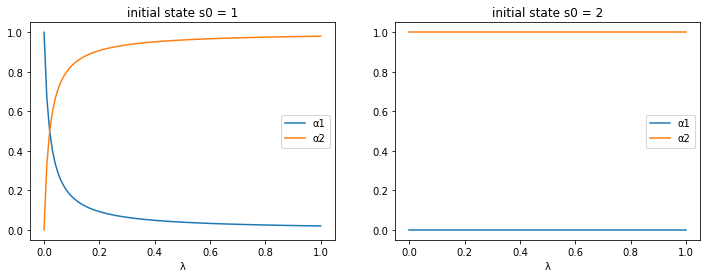

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

for i, αs_seq in enumerate([αs0_seq, αs1_seq]):
    for j in range(2):
        axs[i].plot(λ_seq, αs_seq[:, j], label=f'α{j+1}')
        axs[i].set_xlabel('λ')
        axs[i].set_title(f'initial state s0 = {s[i]}')
        axs[i].legend()

plt.show()

### Example 4

In [29]:
# dimensions
K, n = 2, 3

# states
s = np.array([1, 2, 3])

# transition
λ = .9
μ = .9
δ = .05

P = np.array([[1-λ, λ, 0], [μ/2, μ, μ/2], [(1-δ)/2, (1-δ)/2, δ]])

# endowments
ys = np.empty((n, K))
ys[:, 0] = [.25, .75, .2]       # y1
ys[:, 1] = [1.25, .25, .2]      # y2

In [30]:
ex4 = RecurCompetitive(s, P, ys)

In [31]:
# endowments
print("ys = \n", ex4.ys)

# pricing kernal
print ("Q = \n", ex4.Q)

# Risk free rate R
print("R = ", ex4.R)

# natural debt limit, A = [A1, A2, ..., AI]
print("A = \n", ex4.A)

print('')

for i in range(1, 4):
    # when the initial state is state i
    print(f"when the initial state is state {i}")
    print(f'α = {ex4.wealth_distribution(s0_idx=i-1)}')
    print(f'ψ = \n{ex4.continuation_wealths()}')
    print(f'J = \n{ex4.value_functionss()}\n')

ys = 
 [[0.25 1.25]
 [0.75 0.25]
 [0.2  0.2 ]]
Q = 
 [[0.098      1.08022498 0.        ]
 [0.36007499 0.882      0.69728222]
 [0.24038317 0.29440805 0.049     ]]
R =  [1.43172499 0.44313807 1.33997564]
A = 
 [[-1.4141307  -0.45854174]
 [-1.4122483  -1.54005386]
 [-0.58434331 -0.3823659 ]]

when the initial state is state 1
α = [0.75514045 0.24485955]
ψ = 
[[[ 0.          0.        ]
  [-0.81715447  0.81715447]
  [-0.14565791  0.14565791]]]
J = 
[[[-2.65741909 -1.51322919]
  [-5.13103133 -2.92179221]
  [-2.65649938 -1.51270548]]]

when the initial state is state 2
α = [0.47835493 0.52164507]
ψ = 
[[[ 0.5183286  -0.5183286 ]
  [ 0.         -0.        ]
  [ 0.12191319 -0.12191319]]]
J = 
[[[-2.11505328 -2.20868477]
  [-4.08381377 -4.26460049]
  [-2.11432128 -2.20792037]]]

when the initial state is state 3
α = [0.60446648 0.39553352]
ψ = 
[[[ 0.28216299 -0.28216299]
  [-0.37231938  0.37231938]
  [ 0.         -0.        ]]]
J = 
[[[-2.37756442 -1.92325926]
  [-4.59067883 -3.71349163]
  [-2

## Finite Horizon 

The Python class **RecurCompetitive** provided above also can be used to compute competitive equilibrium
allocations and Arrow securities prices for finite horizon economies.  

The setting is a finite-horizon version of  the one above except that time now runs for $T+1$ periods 
$t \in {\bf T} = \{ 0, 1, \ldots, T\}$.  

Consequently, we want  $T+1$ counterparts to objects described above, with one important exception:
we won't need **borrowing limits**.

 * borrowing limits aren't required for a finite horizon economy in which a
one-period utility function $u(c)$ satisfies an Inada condition that sets the marginal utility of consumption at zero consumption to zero.  
 * Nonnegativity of consumption choices at all $t \in {\bf T}$ automatically
limits borrowing. 


### Continuation Wealths


We denote  a $K \times 1$ vector of  state-dependent continuation wealths in Markov state $s$ at time $t$ as

$$
\psi_t\left(s\right)=\left[\begin{array}{c}
\psi^{1}\left(s\right)\\
\vdots\\
\psi^{K}\left(s\right)
\end{array}\right], \quad s \in \left[\bar{s}_1, \ldots, \bar{s}_n\right]
$$

and an  $n \times 1$ vector of continuation wealths for each individual $k$ as

$$
\psi_t^{k}=\left[\begin{array}{c}
\psi_t^{k}\left(\bar{s}_{1}\right)\\
\vdots\\
\psi_t^{k}\left(\bar{s}_{n}\right)
\end{array}\right], \quad k \in \left[1, \ldots, K\right]
$$



Continuation wealths  $\psi^k$ of consumer $k$ satisfy

$$
\begin{aligned}
\psi_T^k & =  \left[\alpha_k y - y^k\right] \cr
\psi_{T-1}^k & =  \left[I + Q \right] \left[\alpha_k y - y^k\right] \cr
\vdots \quad  & \quad \quad \quad \vdots \cr
\psi_0^k  & = \left[I + Q + Q^2 + \cdots + Q^T \right] \left[\alpha_k y - y^k\right]
\end{aligned}
$$ (eq:vv)

where

$$
y^{k}=\left[\begin{array}{c}
y^{k}\left(\bar{s}_{1}\right)\\
\vdots\\
y^{k}\left(\bar{s}_{n}\right)
\end{array}\right],\quad y=\left[\begin{array}{c}
y\left(\bar{s}_{1}\right)\\
\vdots\\
y\left(\bar{s}_{n}\right)
\end{array}\right]
$$

Note that $\sum_{k=1}^K \psi_t^k = {0}_{n \times 1}$ for all $t \in {\bf T}$.

**Remark:** At the initial state $s_0 \in \begin{bmatrix} \bar s_1, \ldots, \bar s_n \end{bmatrix}$, 
 for all agents $k = 1, \ldots, K$, continuation wealth $\psi_0^k(s_0) = 0$.  This indicates that
the economy begins with  all agents being debt-free and financial-asset-free at time $0$, state $s_0$.  


**Remark:** Note that all agents' continuation wealths  return to zero when the Markov state returns to whatever value $s_0$ it had at time $0$. This will recur if the Markov chain makes the initial state $s_0$ recurrent.




With the initial state being  a particular state $s_0 \in \left[\bar{s}_1, \ldots, \bar{s}_n\right]$, we must have

$$
\psi_0^k\left(s_0\right) = 0, \quad k=1, \ldots, K
$$

which means the equilibrium distribution of wealth satisfies

$$
\alpha_k = \frac{V_z y^k}{V_z y}
$$ (eq:w)



where  now in our finite-horizon economy  

$$
 V = \left[I + Q + Q^2 + \cdots + Q^T \right]
$$ (eq:ww)

and $z$ is the row index corresponding to the initial state $s_0$. 

Since $\sum_{k=1}^K V_z y^k = V_z y$,  $\sum_{k=1}^K \alpha_k = 1$.


In summary, here is the logical flow of an algorithm to compute a competitive equilibrium with Arrow securities
in our finite-horizon Markov economy:

* compute $Q$ from the aggregate allocation and  formula {eq}`eq:Qformula`

* compute the distribution of wealth $\alpha$ from  formulas {eq}`eq:w` and {eq}`eq:ww`

* using  $\alpha$, assign each consumer $k$ the share  $\alpha_k$ of the aggregate endowment at each state

* return to the $\alpha$-dependent formula {eq}`eq:vv` for continuation wealths and compute continuation wealths

* equate agent $k$'s portfolio to its continuation wealth state by state


While for  the infinite horizon economy, the formula for value functions  is

$$ J^k = (I - \beta P)^{-1} u(\alpha_k y)  , \quad u(c) = \frac{c^{1-\gamma}}{1-\gamma} $$

for the finite horizon economy the formula is

$$ J_0^k = (I + \beta P + \cdots + \beta^T P^T) u(\alpha_k y) , $$

where it is understood that $ u(\alpha_k y)$ is a vector.

### Finite Horizon Example

Below we revisit the economy defined in example 1, but set the time horizon to be $T=10$.

In [32]:
# dimensions
K, n = 2, 2

# states
s = np.array([0, 1])

# transition
P = np.array([[.5, .5], [.5, .5]])

# endowments
ys = np.empty((n, K))
ys[:, 0] = 1 - s       # y1
ys[:, 1] = s           # y2

In [33]:
ex1_finite = RecurCompetitive(s, P, ys, T=10)

In [34]:
# (I + Q + Q^2 + ... + Q^T)
ex1_finite.V[-1]

array([[5.48171623, 4.48171623],
       [4.48171623, 5.48171623]])

In [35]:
# endowments
ex1_finite.ys

array([[1., 0.],
       [0., 1.]])

In [36]:
# pricing kernal
ex1_finite.Q

array([[0.49, 0.49],
       [0.49, 0.49]])

In [37]:
# Risk free rate R
ex1_finite.R

array([1.02040816, 1.02040816])

In the finite time horizon case, `ψ` and `J` are returned as sequences.

Components  are ordered from $t=T$ to $t=0$.

In [38]:
# when the initial state is state 2
print(f'α = {ex1_finite.wealth_distribution(s0_idx=0)}')
print(f'ψ = \n{ex1_finite.continuation_wealths()}\n')
print(f'J = \n{ex1_finite.value_functionss()}')

α = [0.55018351 0.44981649]
ψ = 
[[[-0.44981649  0.44981649]
  [ 0.55018351 -0.55018351]]

 [[-0.40063665  0.40063665]
  [ 0.59936335 -0.59936335]]

 [[-0.35244041  0.35244041]
  [ 0.64755959 -0.64755959]]

 [[-0.30520809  0.30520809]
  [ 0.69479191 -0.69479191]]

 [[-0.25892042  0.25892042]
  [ 0.74107958 -0.74107958]]

 [[-0.21355851  0.21355851]
  [ 0.78644149 -0.78644149]]

 [[-0.16910383  0.16910383]
  [ 0.83089617 -0.83089617]]

 [[-0.12553824  0.12553824]
  [ 0.87446176 -0.87446176]]

 [[-0.08284397  0.08284397]
  [ 0.91715603 -0.91715603]]

 [[-0.04100358  0.04100358]
  [ 0.95899642 -0.95899642]]

 [[-0.         -0.        ]
  [ 1.         -1.        ]]]

J = 
[[[ 1.48348712  1.3413672 ]
  [ 1.48348712  1.3413672 ]]

 [[ 2.9373045   2.65590706]
  [ 2.9373045   2.65590706]]

 [[ 4.36204553  3.94415611]
  [ 4.36204553  3.94415611]]

 [[ 5.75829174  5.20664019]
  [ 5.75829174  5.20664019]]

 [[ 7.12661302  6.44387459]
  [ 7.12661302  6.44387459]]

 [[ 8.46756788  7.6563643 ]
  [ 8

In [39]:
# when the initial state is state 2
print(f'α = {ex1_finite.wealth_distribution(s0_idx=1)}')
print(f'ψ = \n{ex1_finite.continuation_wealths()}\n')
print(f'J = \n{ex1_finite.value_functionss()}')

α = [0.44981649 0.55018351]
ψ = 
[[[-0.55018351  0.55018351]
  [ 0.44981649 -0.44981649]]

 [[-0.59936335  0.59936335]
  [ 0.40063665 -0.40063665]]

 [[-0.64755959  0.64755959]
  [ 0.35244041 -0.35244041]]

 [[-0.69479191  0.69479191]
  [ 0.30520809 -0.30520809]]

 [[-0.74107958  0.74107958]
  [ 0.25892042 -0.25892042]]

 [[-0.78644149  0.78644149]
  [ 0.21355851 -0.21355851]]

 [[-0.83089617  0.83089617]
  [ 0.16910383 -0.16910383]]

 [[-0.87446176  0.87446176]
  [ 0.12553824 -0.12553824]]

 [[-0.91715603  0.91715603]
  [ 0.08284397 -0.08284397]]

 [[-0.95899642  0.95899642]
  [ 0.04100358 -0.04100358]]

 [[-1.          1.        ]
  [-0.         -0.        ]]]

J = 
[[[ 1.3413672   1.48348712]
  [ 1.3413672   1.48348712]]

 [[ 2.65590706  2.9373045 ]
  [ 2.65590706  2.9373045 ]]

 [[ 3.94415611  4.36204553]
  [ 3.94415611  4.36204553]]

 [[ 5.20664019  5.75829174]
  [ 5.20664019  5.75829174]]

 [[ 6.44387459  7.12661302]
  [ 6.44387459  7.12661302]]

 [[ 7.6563643   8.46756788]
  [ 7

We can check the results with finite horizon converges to the ones with infinite horizon as $T \rightarrow \infty$.

In [40]:
ex1_large = RecurCompetitive(s, P, ys, T=10000)
ex1_large.wealth_distribution(s0_idx=1)

array([0.49, 0.51])

In [41]:
ex1.V, ex1_large.V[-1]

(array([[[25.5, 24.5],
         [24.5, 25.5]]]),
 array([[25.5, 24.5],
        [24.5, 25.5]]))

In [42]:
ex1_large.continuation_wealths()
ex1.ψ, ex1_large.ψ[-1]

(array([[[-1.,  1.],
         [ 0., -0.]]]),
 array([[-1.,  1.],
        [ 0., -0.]]))

In [43]:
ex1_large.value_functionss()
ex1.J, ex1_large.J[-1]

(array([[[70.        , 71.41428429],
         [70.        , 71.41428429]]]),
 array([[70.        , 71.41428429],
        [70.        , 71.41428429]]))